# Tarea 4. Estadística
Katherin A. Murcia S. y Juan Carlos Rojas V.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math_utilities
import pandas as pd
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text',usetex=True)

_Geometry of the best-fit straight line_ 

Show, using equations $$m = \frac{N \sum_{i}x_iy_i - \sum_{i=1}x_i\sum_{i=1}y_i}{\Delta}$$ and $$c = \frac{\sum_{i=1}x_i^2\sum_{i=1}y_i - \sum_{i=1}x_i\sum_{i=1}x_iy_i}{\Delta},$$ that the line of the best fit goes through the point $(\bar{x},\bar{y})$.

Teniendo en cuenta que la ecuación de la recta de mejor fit sigue la forma 
$$y = mx + c,$$ sería suficiente con ver que, al poner como argumento $\bar{x}$, se obtiene $\bar{y}$. Se sigue que:

\begin{align*}
y(\bar{x}) &= \left(\frac{N \sum_{i}x_iy_i - \sum_{i=1}x_i\sum_{i=1}y_i}{\Delta}\right)\left( \frac{\sum_{i=1}x_i}{N}\right) + \frac{\sum_{i=1}x_i^2\sum_{i=1}y_i - \sum_{i=1}x_i\sum_{i=1}x_iy_i}{\Delta} \\
&= \frac{1}{N\Delta}\left( N\sum_{i=1}x_i\sum_{i=1}x_iy_i - \left( \sum_{i=1}x_i\right)^2\sum_{i=1}y_i + N\sum_{i=1}x_i^2\sum_{i=1}y_i -N\sum_{i=1}x_i\sum_{i=1}x_iy_i\right)\\
&= \frac{1}{N\Delta} \left( N\sum_{i=1}x_i^2 - \left( \sum_{i=1}x_i\right)^2\right)\sum_{i=1}y_i\\
&= \frac{\sum_{i=1}y_i}{N} = \bar{y}
\end{align*}

Se demuestra, entonces, que si se tiene $\bar{x}$ como argumento, se obtendrá $\bar{y}$. Por tanto, la línea, en efecto, pasa por el punto $(\bar{x},\bar{y})$.

----

_Best-fit straight line - an unweighted fit_

The data listed below come from an experiment to verify Ohm's law. The voltage across a resistor (the dependent variable) was measured as a function of the current flowing (the independent variable). The precision of the voltimeter was $0.01 \text{ mV}$, and the uncertainty in the current was negligible.

In [38]:
voltage = np.array([0.98,1.98,2.98,3.97,4.95,5.95,6.93,7.93,8.91])
current = np.array([10,20,30,40,50,60,70,80,90])

Table = pd.DataFrame({r"Current [$\mu \text{A}$]:":current,r"Voltage [$\text{mV}$]":voltage})
Table.T

,0,1,2,3,4,5,6,7,8
Current [$\mu \text{A}$]:,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00
Voltage [$\text{mV}$],0.98,1.98,2.98,3.97,4.95,5.95,6.93,7.93,8.91


**(i)** Use the results of Section 5.2.1 to calculate the unweighted best-fit gradient and intercept, and their uncertanties.

Usando los resultados y las ecuaciones 5.1, 5.2 , 5.3, 5.4, 5.5  y 5.6 de la misma sección se obtiene que

In [39]:
def linear_unw_regression(x_data: np.array, y_data: np.array):
    N = len(x_data) # Número de datos
    Delta = N*np.sum(x_data**2) - np.sum(x_data)**2 #Cantidad que servirá de denominador
    m = (N*np.sum(x_data*y_data) - np.sum(x_data)*np.sum(y_data))/Delta # Pendiente del ajuste
    b = (np.sum(x_data**2)*np.sum(y_data) - np.sum(x_data)*np.sum(x_data*y_data))/Delta # Intercepto del ajuste
    uncer_CU = np.sqrt((np.sum(y_data - m*x_data - b)**2)/(N-2)) # Incertidumbre común
    uncer_b = uncer_CU*np.sqrt(np.sum(x_data**2)/Delta) # Incertidumbre del intercepto
    uncer_m = uncer_CU*np.sqrt(N/Delta) # Incertidumbre de la pendiente
    
    return np.array([m,uncer_m,b,uncer_b,uncer_CU])

In [40]:
m,un_m,b,un_b,un_CM = linear_unw_regression(current,voltage)
m,un_m,b,un_b,un_CM

(np.float64(0.09908333333333333),
 np.float64(1.1621873603747669e-17),
 np.float64(-0.0008333333333333334),
 np.float64(6.539993597306053e-16),
 np.float64(9.00226458380846e-16))

Por tanto $m = 0.09908$, $\sigma_{m} = 1.162\times10^{-17}$, $b = -0.000833$ y $\sigma_b=6.54\times10^{-16}$

**(ii)** Calculate the common uncertainty and compare the value with the experimental uncertainty.

La incertidumbre conjunta fue calculada anteriormente, se obtuvo un valor de:

In [50]:
float(un_CM)

9.00226458380846e-16

El cual es al menos 14 órdenes de magnitud menor al experimental reportado en el experimento.

**(iii)** Plot a graph of the data and add the best-fit
straight line.

In [51]:
current_linspace = np.linspace(0,100,500)
voltaje_regressed = m*current_linspace + b

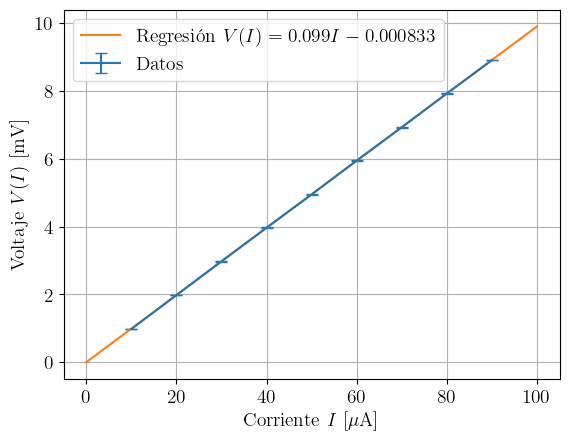

In [52]:
plt.errorbar(current,voltage,yerr=0.01,label = "Datos",capsize=4)
plt.plot(current_linspace,voltaje_regressed,label=r"Regresión $V(I) = 0.099I -0.000833$")
plt.xlabel(r"Corriente $I$ [$\mu$A]")
plt.ylabel(r"Voltaje $V(I)$ [mV]")
plt.legend()
plt.grid()


**(iv)** Calculate the residuals, and comment
on their magnitudes.

In [55]:
residuals = voltage - (m*current + b)

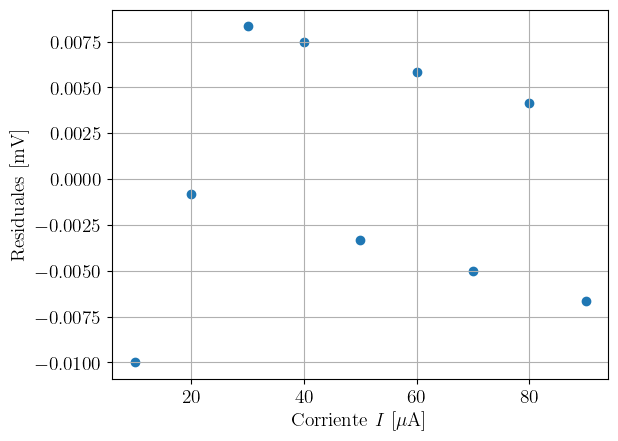

In [58]:
plt.scatter(current,residuals)
plt.xlabel(r"Corriente $I$ [$\mu$A]")
plt.ylabel(r"Residuales [mV]")
plt.grid()

Como se puede ver, los residuales se encuentran oscilando de manera aleatoria entre alrededor de cero. Y su magnitud es un orden de magnitud por debajo de la incertidumbre experimental.